## Problem Statement

1. Finding similar type of company names
2. clustering the company names
Please refer the below image to understand the problem statement correctly

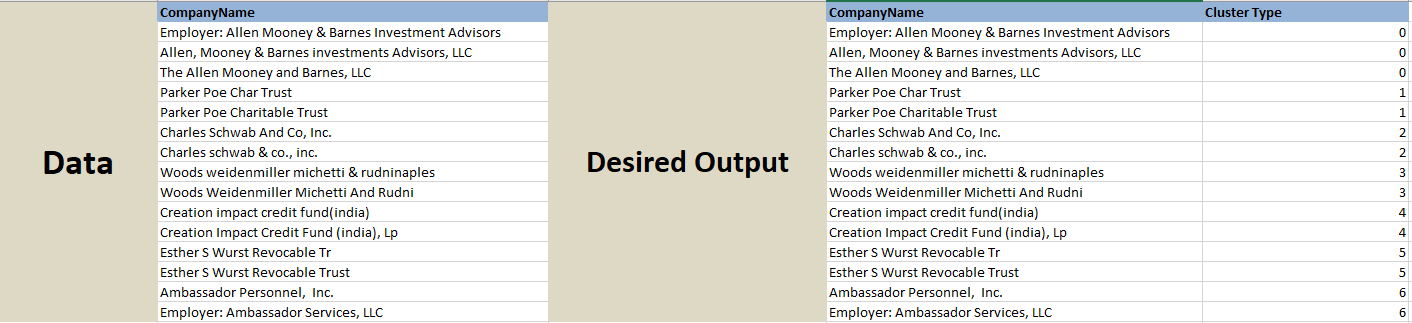

## How this algo works?

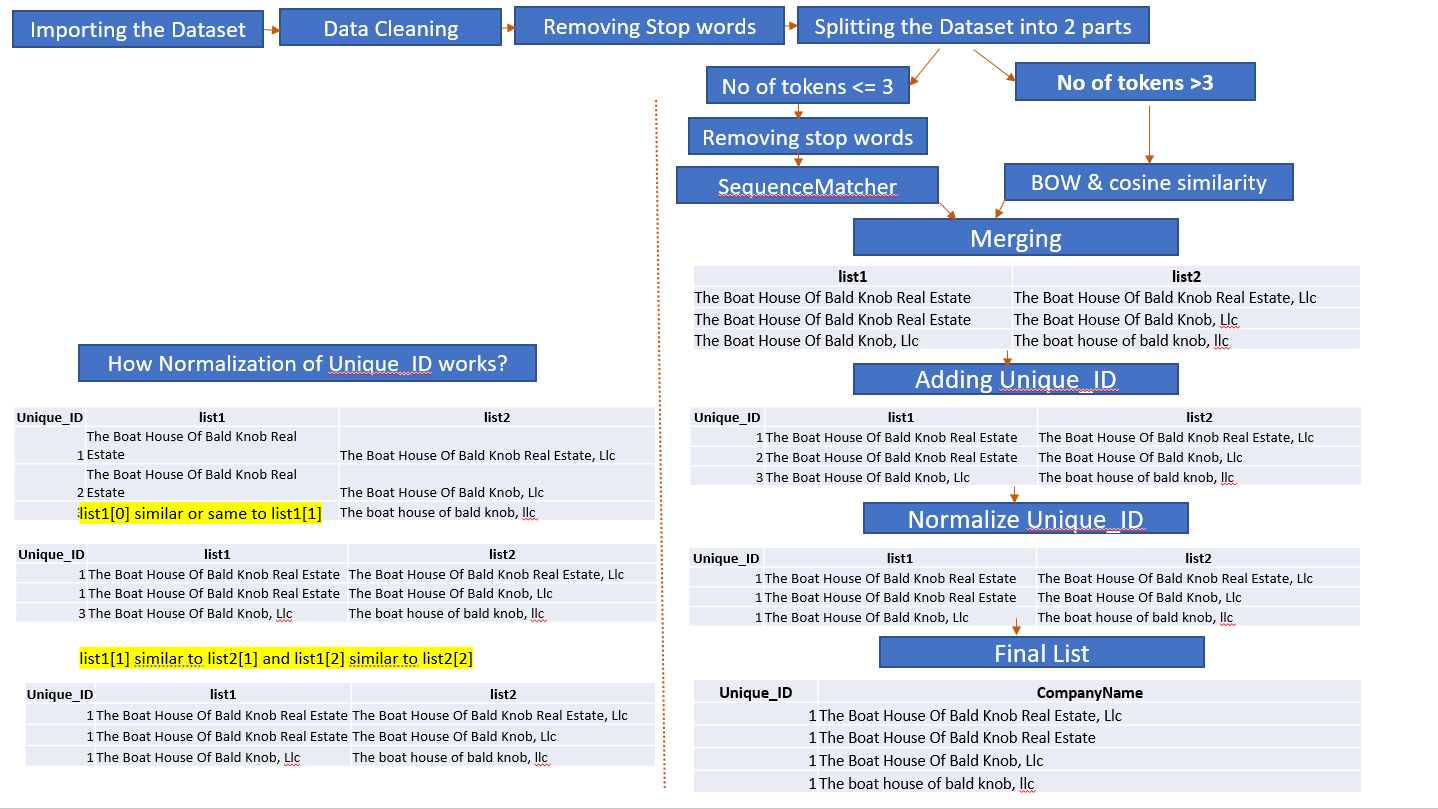

Data: https://github.com/SuryaSD/Clustering_of_CompanyName/blob/main/CompanyName.xlsx

## Importing the file and removing the NA value

In [112]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df= pd.read_excel(r'C:\Promus_Local\CompanyName_N.xlsx','Sheet1')
corpus = list(set(df["CompanyName"].values))
corpus2 = list(set(df["CompanyName"].values))

corpus = list(filter(lambda x: str(x) != 'nan', corpus))
corpus2 = list(filter(lambda x: str(x) != 'nan', corpus2))


## Data Cleaning - removing the punctuation and number value. Removing the stop words. replacing some keywords

In [113]:
import re
new_corpus2 = []
corpus_backup =[]
for i in range (len(corpus)):
    try:
        review = re.sub("&" , "and" , corpus[i])
        review = re.sub('[^a-zA-Z]',' ',review)
        review = review.lower()
        new_corpus2.append(review)
        corpus_backup.append(corpus[i])
    except:
        new_corpus2.append(review)
        corpus_backup.append(corpus[i])

from nltk.tokenize import word_tokenize 
new_corpus = []
my_stop_words = ['an','the','in','at','employer','ttee','trust','i','ii','iii','iv','v','vi','vii','viii','ix',
                     'x','xi','xii','xiii','xiv','xv']
for i in range (len(new_corpus2)):
      review = new_corpus2[i]
      review = [w for w in word_tokenize(review)  if not w in my_stop_words]
      review = ' '.join(review)
      review = re.sub(' +', ' ', review)
      review = re.sub("ttee" , "trust" , review)
      review = re.sub("tru" , "trust" , review)
      review = re.sub("&" , "and" , review)
      review = re.sub("irre" , "irrevocable" , review)
      review = re.sub("investments" , "investment" , review)
      review = re.sub("comp" , "company" , review)
      review = re.sub(' +', ' ', review)
      review = review.strip()
      new_corpus.append(review)


## Splitting the Dataset into two parts on basis of tokens

In [114]:
corpus_p1 = []
corpus_p2 = []
corpus_p1_m = []
corpus_p2_m = []

for i in range (len(new_corpus)):
    if len(new_corpus[i].split(' '))>3:
        corpus_p1.append(new_corpus[i])
        corpus_p1_m.append(corpus_backup[i])
    else:
        corpus_p2.append(new_corpus[i])
        corpus_p2_m.append(corpus_backup[i])

## Running BOW algo for the first list

In [115]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_p1)
list1_1 = []
list1_2 = []
threshold = 0.7
for x in range(0,X.shape[0]):
  for y in range(x,X.shape[0]):
    if(x!=y):
      if(cosine_similarity(X[x],X[y])>threshold) and (corpus_p1_m[x] != corpus_p1_m[y] and corpus_p1[x][1]==corpus_p1[y][1]):
        #print((corpus[x],' | | ',corpus[y])) 
        list1_1.append(corpus_p1_m[x])
        list1_2.append(corpus_p1_m[y])

In [116]:
for i in range (len(list1_1)):
    print(list1_1[i],' ', list1_2[i])

Charles schwab & co., inc.   Charles schwab & co, inc.
Charles schwab & co., inc.   Charles Schwab & Co, Inc.
Charles schwab & co., inc.   Charles Schwab And Co, Inc.
Charles schwab & co., inc.   Charles Schwab & Co., Inc.
Charles schwab & co., inc.   Charles Schwab And Company, Inc.
The code family partnership, lp   Code family partnership, lp
The code family partnership, lp   The Code Family Partnership, Lp
The code family partnership, lp   The code family partenreship, lp
The code family partnership, lp   Code Family Partnership, Lp
Woods Weidenmiller Michetti And Rudni   Woods weidenmiller michetti & rudninaples
Coleman, Yovanovich & Koester, P.a   Coleman yovanovich & koester, p.a.
Coleman, Yovanovich & Koester, P.a   Coleman, yovanovich & koester, pa
Boat House Of Cape Coral, Llc   Boat house of cape coral, llc
Boat House Of Cape Coral, Llc   The boat house of cape coral, llc
Coleman yovanovich & koester, p.a.   Coleman, yovanovich & koester, pa
Code family partnership, lp   The 

## Removing some other keywords from the second list

In [117]:
my_stop_words2 = ['llc','llp','lp','inc','pvt','lllc','co','company','corp','employer','re']
for i in range (len(corpus_p2)):
      #print(corpus_p2[i])
      review = corpus_p2[i]
    #review = re.sub(' +', ' ', review)
    #if (len(review)-len(re.sub(' +', '', review)))<10:
      review = [w for w in word_tokenize(review)  if not w in my_stop_words2]
      review = ' '.join(review)
      #print(review)
      review = re.sub(' +', ' ', review)
      review = review.strip()
      corpus_p2[i] = review

## Running sequencematcher in second list

In [118]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

#print(similar("Apple","Apple M"))

list2_1 = []
list2_2 = []

for x in range(0,len(corpus_p2)):
  for y in range(x,len(corpus_p2)):
    if(x!=y):
      if((similar(corpus_p2[x],corpus_p2[y])>.70)):
        print((corpus_p2_m[x],' | | ',corpus_p2_m[y])) 
        list2_1.append(corpus_p2_m[x])
        list2_2.append(corpus_p2_m[y])

('Parker Poe Charitable Trust', ' | | ', 'Parker Poe Char Trust')
('Advocacy Associates', ' | | ', 'Advocacy Associates, Inc.')
('Hospice Foundation', ' | | ', 'Hospice Foundation O')
('Macon Water Authority', ' | | ', 'Macon Water Authorit')
('Kate Ireland 4/21/91Trust', ' | | ', 'Kate Per Ireland Trust')
('George Oliva Iii Ttee', ' | | ', 'George Oliva Jr Trust')
('Frisby Family Trust', ' | | ', 'Frisby Family')


## Merging two list

In [119]:
list1 = list1_1 + list2_1
list2 = list1_2 + list2_2

## Adding the Unique_ID

In [120]:
unique_id = []
for i in range (len(list1)):
    unique_id.append(i)

In [121]:
for i in range (len(list1)):
    print(unique_id[i],'|',list1[i],'|', list2[i])

0 | Charles schwab & co., inc. | Charles schwab & co, inc.
1 | Charles schwab & co., inc. | Charles Schwab & Co, Inc.
2 | Charles schwab & co., inc. | Charles Schwab And Co, Inc.
3 | Charles schwab & co., inc. | Charles Schwab & Co., Inc.
4 | Charles schwab & co., inc. | Charles Schwab And Company, Inc.
5 | The code family partnership, lp | Code family partnership, lp
6 | The code family partnership, lp | The Code Family Partnership, Lp
7 | The code family partnership, lp | The code family partenreship, lp
8 | The code family partnership, lp | Code Family Partnership, Lp
9 | Woods Weidenmiller Michetti And Rudni | Woods weidenmiller michetti & rudninaples
10 | Coleman, Yovanovich & Koester, P.a | Coleman yovanovich & koester, p.a.
11 | Coleman, Yovanovich & Koester, P.a | Coleman, yovanovich & koester, pa
12 | Boat House Of Cape Coral, Llc | Boat house of cape coral, llc
13 | Boat House Of Cape Coral, Llc | The boat house of cape coral, llc
14 | Coleman yovanovich & koester, p.a. | Col

## Normalization of Unique_ID

In [128]:
for i in range (0,len(list1)):
    for j in range (i+1,len(list1)):
        if list1[j] == list1[i]:
            if (unique_id[j]>unique_id[i]):
              unique_id[j]=unique_id[i]
            else:
                unique_id[i]=unique_id[j]

for i in range (0,len(list1)):
    for j in range (i+1,len(list1)):
        if list2[j] == list2[i]:
            if (unique_id[j]>unique_id[i]):
              unique_id[j]=unique_id[i]
            else:
                unique_id[i]=unique_id[j]
                
                
for i in range (0,len(list1)):
    for j in range (len(list1)):
        if list1[j] == list2[i]:
            if (unique_id[j]>unique_id[i]):
              unique_id[j]=unique_id[i]
            else:
                unique_id[i]=unique_id[j]
                
                
for i in range (len(list1)):
    for j in range (len(list1)):
        if list2[j] == list1[i]:
            if (unique_id[j]>unique_id[i]):
              unique_id[j]=unique_id[i]
            else:
                unique_id[i]=unique_id[j]                

In [129]:
for i in range (len(list1)):
    print(unique_id[i],'|',list1[i],'|', list2[i])

0 | Charles schwab & co., inc. | Charles schwab & co, inc.
0 | Charles schwab & co., inc. | Charles Schwab & Co, Inc.
0 | Charles schwab & co., inc. | Charles Schwab And Co, Inc.
0 | Charles schwab & co., inc. | Charles Schwab & Co., Inc.
0 | Charles schwab & co., inc. | Charles Schwab And Company, Inc.
5 | The code family partnership, lp | Code family partnership, lp
5 | The code family partnership, lp | The Code Family Partnership, Lp
5 | The code family partnership, lp | The code family partenreship, lp
5 | The code family partnership, lp | Code Family Partnership, Lp
9 | Woods Weidenmiller Michetti And Rudni | Woods weidenmiller michetti & rudninaples
10 | Coleman, Yovanovich & Koester, P.a | Coleman yovanovich & koester, p.a.
10 | Coleman, Yovanovich & Koester, P.a | Coleman, yovanovich & koester, pa
12 | Boat House Of Cape Coral, Llc | Boat house of cape coral, llc
12 | Boat House Of Cape Coral, Llc | The boat house of cape coral, llc
10 | Coleman yovanovich & koester, p.a. | Col

In [133]:
unique_c = list(set(unique_id))
unique_c
all_cluster = []
for i in range (len(unique_c)):
    cluster = []
    for j in range (len(list1)):
        if unique_c[i] == unique_id[j]:
            cluster.append(list1[j])
            cluster.append(list2[j])
    all_cluster.append(list(set(cluster)))
all_cluster  

df_final=pd.DataFrame(all_cluster[0])
df_final=pd.DataFrame(all_cluster[0])
for i in range(len(all_cluster)-1):
    df_final=pd.concat([df_final,pd.DataFrame(all_cluster[i+1])])
df_final

df_final = df_final.rename(columns = {0:'CompanyName'})
df_final

        
control_len=[]
for i in range (len(unique_c)):
    for j in range (len(all_cluster[i])):
        control_len.append(unique_c[i])
df_final['cluster']=control_len


In [135]:
df_final.to_excel(r'C:\Promus_Local\output_N.xlsx',index = False)
df_final.head(50)

,CompanyName,cluster
0,"Charles Schwab And Co, Inc.",0
1,"Charles schwab & co., inc.",0
2,"Charles schwab & co, inc.",0
3,"Charles Schwab And Company, Inc.",0
4,"Charles Schwab & Co, Inc.",0
5,"Charles Schwab & Co., Inc.",0
0,"Code family partnership, lp",5
1,"The code family partnership, lp",5
2,"The Code Family Partnership, Lp",5
3,"The code family partenreship, lp",5


Output Data: https://github.com/SuryaSD/Clustering_of_CompanyName/blob/main/output.xlsx